<a href="https://colab.research.google.com/github/Aastha26-lab/Internship_ML-PROJECT/blob/master/ML_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Internship Studio: Machine Learning Project (Batch: 29th July'20)**

**Title: Marketing Campaign for Banking Products **

Submitted by: Aastha Aggarwal (aasthaggarwal2000@gmail.com) .

**1. Importing required Libraries:-**

In [ ]:
import numpy as np                  # linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import *
sns.set_style("white")
pd.options.mode.chained_assignment = None
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Description of the given question:**

Bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

Loading the given raw dataset to work further on it :

In [ ]:
dc=pd.read_excel('dataset.xlsx')
data=pd.DataFrame(dc)

basic data analysis

data acquisition- processing data 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

In [ ]:
print(data.index)
print('')
print(data.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')



**The attributes can be divided as :**

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

**Interval variables are as below:**

*   Age - Age of the customer

*   Experience - Years of experience

*   CCAvg - Average credit card spending

*   Income - Annual income in dollars

*   Mortage - Value of House Mortgage

**Ordinal Categorical Variables are:**
*   Family - Family size of the customer
*   Education - education level of the customer

**The nominal variables are :**
*   ID
*   Zip Code
*   data.shape

In [ ]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# To check if any column has null data:
data[data.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
data[data<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

data cleaning/sieving

In [ ]:
data[data['Experience']<0]['Experience'].count()

52

In the given dataset , the experience is carrying some negative values which do not hold any significance ...hence median being most accurate form of central tendency measure we will replace the negative values of that column with the median of the experience as:-

In [ ]:
# Replacing the negative values present in the Experience column with it's median
median=int(data['Experience'].median())
for i in range(len(data)):
      if data['Experience'].iloc[i]<0:
        data['Experience'].iloc[i]=median

Verifying if the negative values are replaced by median or not:-

In [ ]:
data[data['Experience']<0]['Experience'].count()

0

In [ ]:
#setting ID columnn as the Index Column as it won't leave any mark on the Model prediction
data.set_index(['ID'], inplace=True)
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**EDA** (Exploratory Data Analysis):-

By definition, exploratory data analysis is an approach to analysing data to summarise their main characteristics, often with visual methods.
in other words, we perform analysis on data that we collected, to find important metrics/features by using some nice and pretty visualisatitons.
every person takes some decisions in their life considering few points at some situations. to be accurate at these decisions data scientist do some EDA on data.

In [ ]:
# Finding the number of unique values in each of the columns
data.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
# finding the names of columns having numerical data
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# to get the insight of the columns having numerical data
numeric_features.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Finding the number of people with zero Mortgage value
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

In [ ]:
# Finding the number of people with no Credit card spending per month
data[data['CCAvg'] == 0]['CCAvg'].count()

106

In [ ]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Now that we have found out the counts of these categorical columns, let's see how many customers who bought the Personal loan use other services provided by the bank

In [ ]:
data_ser = data[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
data_serg= data_ser.groupby('Personal Loan').sum()
data_serg

,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [ ]:
data_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
Securities Account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
CD Account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
Online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
CreditCard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


Let's throw a light on the univariate analysis.

**Univariate analysis**:- provides summary statistics for each field in the raw data set (or) summary only on one variable.

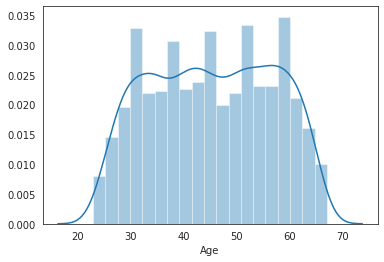

In [ ]:

sns.distplot(data['Age']);

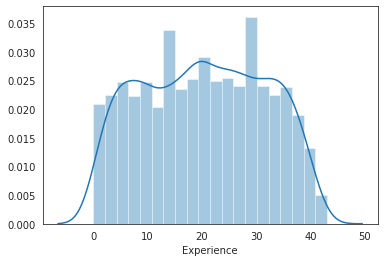

In [ ]:
sns.distplot(data['Experience']);

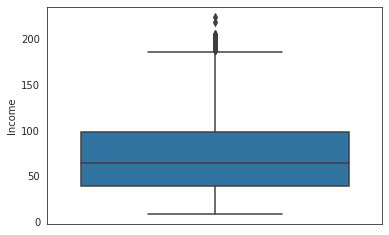

In [ ]:
sns.boxplot(data['Income'], orient='vertical');

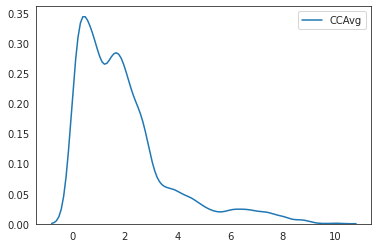

In [ ]:
sns.kdeplot(data['CCAvg']);

The above graph is highly right skewed.

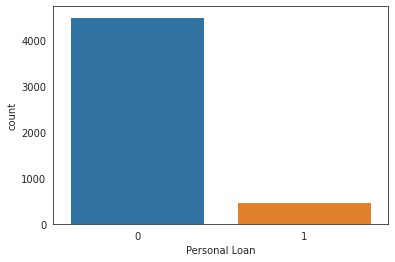

In [ ]:
sns.countplot(data['Personal Loan']);

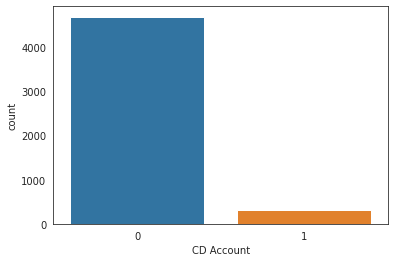

In [ ]:
sns.countplot(data['CD Account']);

Let's throw a light on the Bivariate analysis:

**Bivariate analysis**:- is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding realtionship between them.

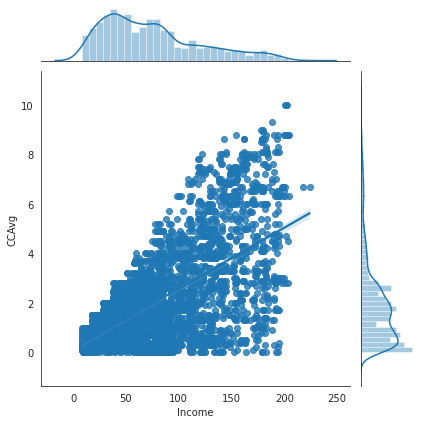

In [ ]:
sns.jointplot(x='Income',y='CCAvg',data=data,kind='reg');

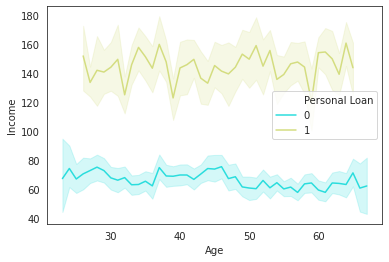

In [ ]:
sns.lineplot(x="Age", y="Income", hue='Personal Loan', data=data,palette='rainbow');

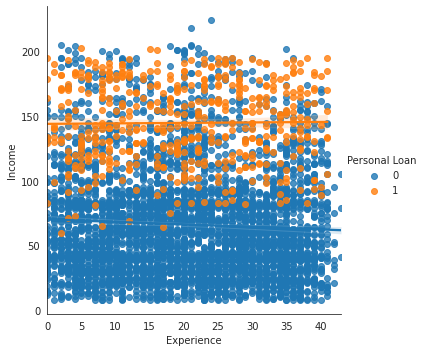

In [ ]:
sns.lmplot(x='Experience', y='Income', hue='Personal Loan', data=data);


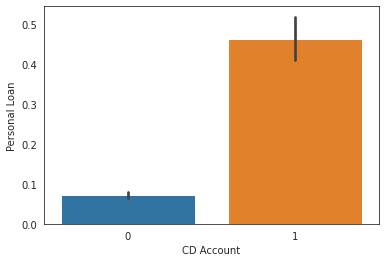

In [ ]:
sns.barplot(x='CD Account', y='Personal Loan', data=data);

Now , to get more insight of our dataset , Let's try Multivariate Analysis:

**Multivariate analysis**:- is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2.

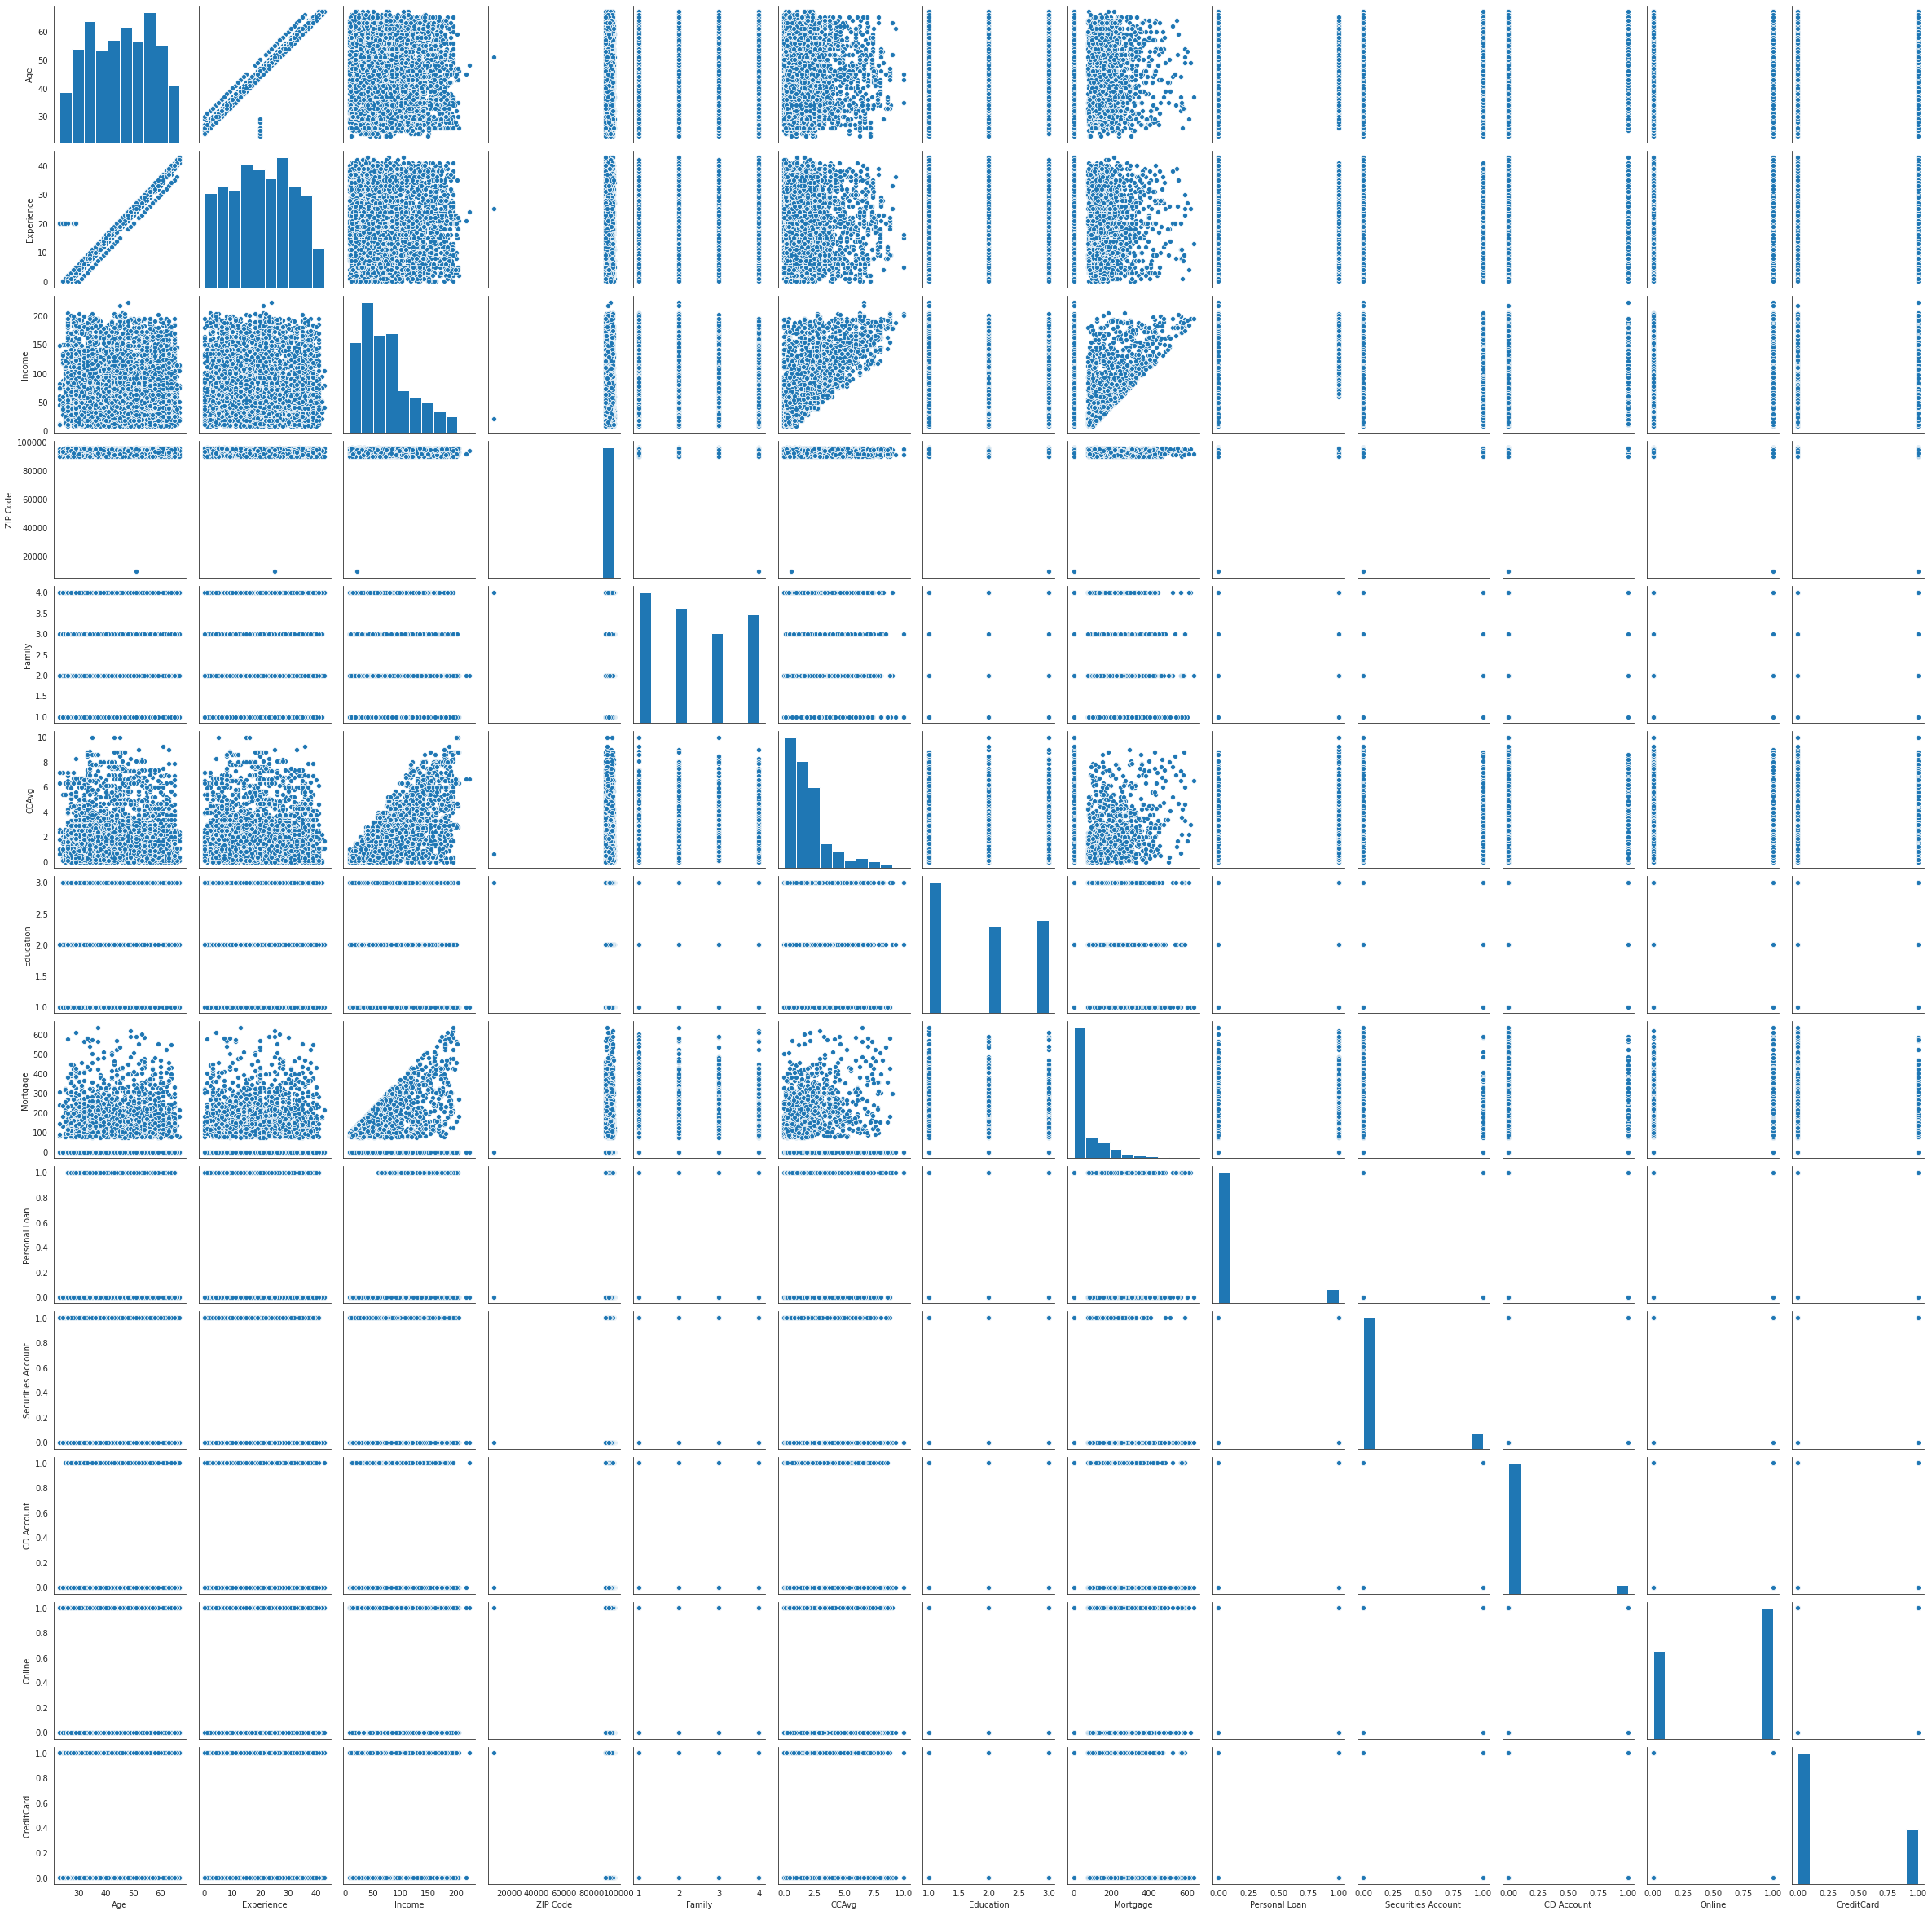

In [ ]:
sns.pairplot(data);


**Result of the analysis of the above Multivariate Analysis:-**

1. Age feature is normally distributed with majority of customers falling b/w 30 & 60 years old. This can be confirmed as it can be seen that mean is almost equal to median.
2. Experience is normally distributed with more customers having experience starting from almost 8 years.This column contains some negative values which are not valid according to our general knowledge.
3. Income has positive skewness which shows that the mean is greater than the median.
4. Mortgage of many persons are less than 40K. 



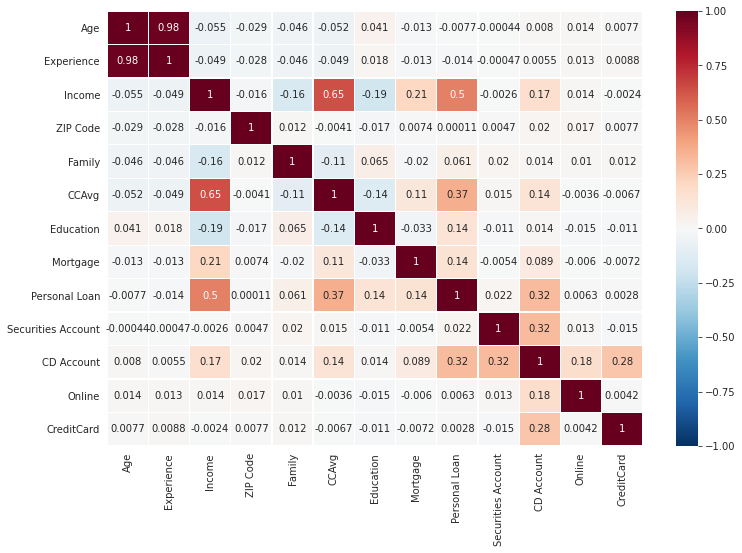

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='RdBu_r',linecolor='white',linewidths=0.25);

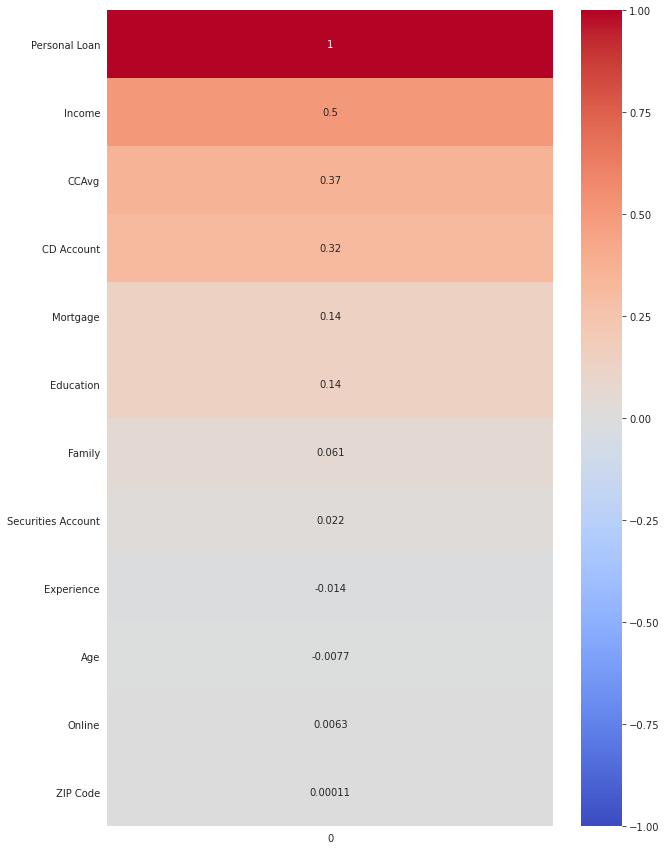

In [ ]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = data.corrwith(data['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

**Influence of income and education on personal loan:-**

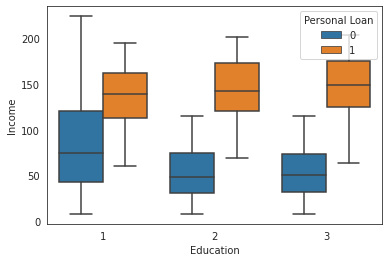

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation :** It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

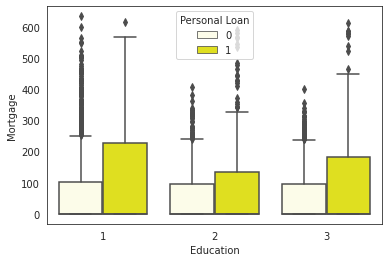

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')


**Inference** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage



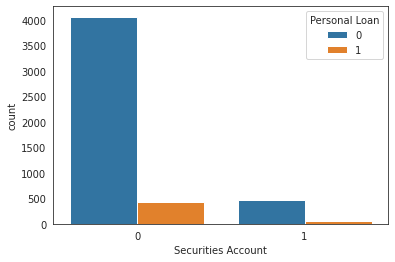

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

**Observation** : Majority of customers who does not have loan have securities account

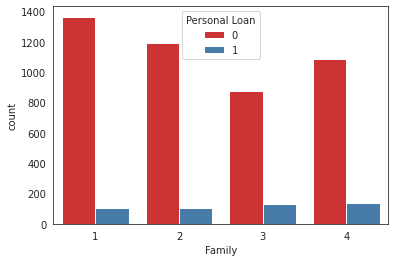

In [ ]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

**Observation** : Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.  

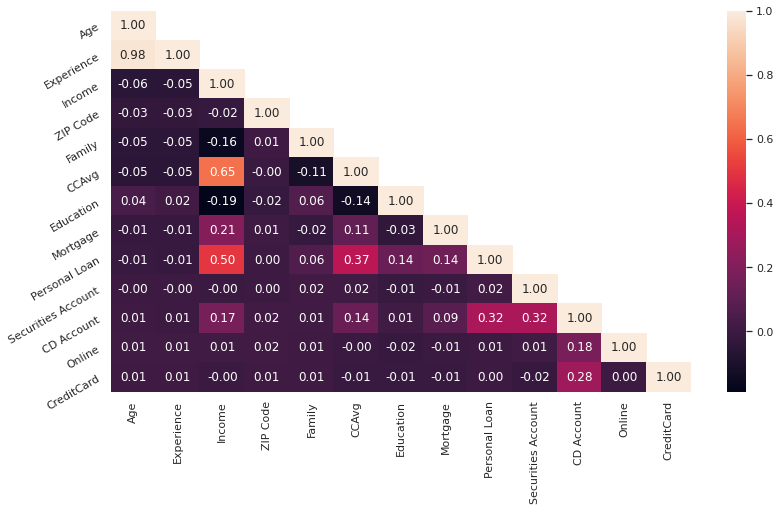

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


**Observation**:- 

*   Income and CCAvg is moderately correlated.
*   Age and Experience is highly correlated


**5) Train-Test Dataset split & Feature Inspection and Transformation.**

In this part, we will have a close check at the distribution of all the features in our Dataset. A balanced Dataset is essential for unbiased predictions from our model.

In [ ]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We will divide our Dataset into a Training data and a Test data set, in the ratio of 70:30. The stratify parameter of train_test_split function will be used to get the same class distribution across our train and the test data set.

In [ ]:
# To attain a clear understanding, seperating the output column that is "Personal Loan" column.
data_X = data.loc[:, data.columns != "Personal Loan"]
data_Y = data[["Personal Loan"]]

Now , Let's split the data into the given ratio that is 70:30 ( training and test set) as :

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

Now , to check the presence of outliers & Skewness present in the data, Let's plot a Boxplot & a Histogram for all the Numerical & Ordinal Categorical features in train_X.

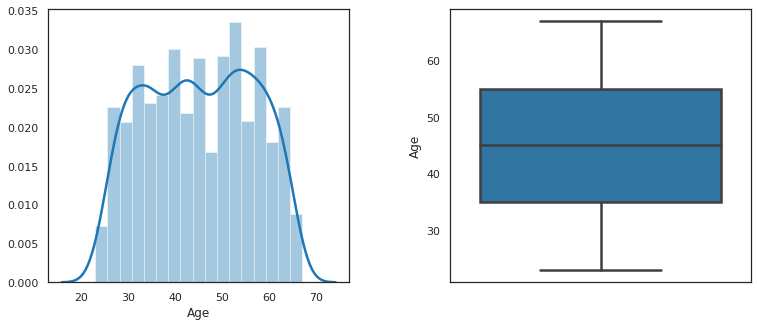

In [ ]:
# Feature 1: 'Age'

fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.distplot(X_train["Age"], ax=axes[0]);
sns.boxplot(X_train["Age"], orient="vertical", ax=axes[1])
fig.tight_layout(pad=5.0)

Observation: Age does not contain any outliers.

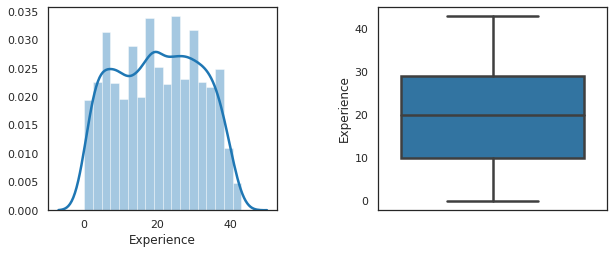

In [ ]:
# Feature 2: 'Experience' 

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(X_train["Experience"], ax=axes[0]);
sns.boxplot(X_train["Experience"], orient="vertical", ax=axes[1])
fig.tight_layout(pad=5.0)

Observation: Experience does not contain any outliers.

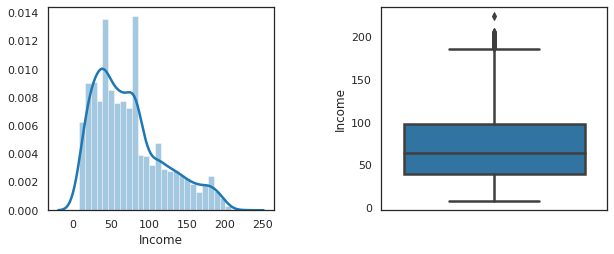

In [ ]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(X_train["Income"], ax=axes[0]);
sns.boxplot(X_train["Income"], orient="v", ax=axes[1]);
fig.tight_layout(pad=5.0)

Observation: Distribution of Income column is highly skewed.
Now, let's try to apply the concept of PowerTransformer to reduce the skewness by reducing the outliers.

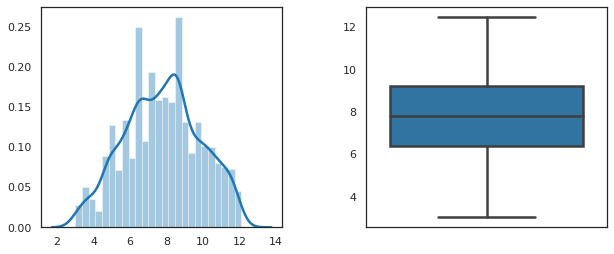

In [ ]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)
pt_income.fit(X_train["Income"].values.reshape(-1, 1))
pti = pt_income.transform(X_train["Income"].values.reshape(-1, 1))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", ax=axes[1])
fig.tight_layout(pad=5.0)

Observation: Hence now since the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well , let's move closer to build the models for prediction.

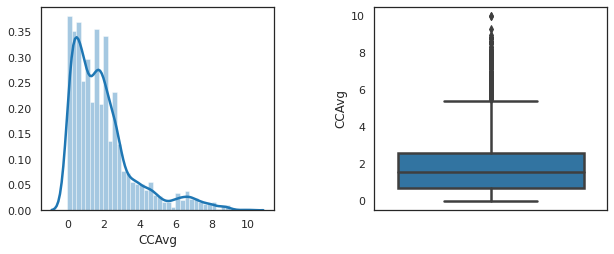

In [ ]:
# Feature 4: 'CC Avg'

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(X_train["CCAvg"], ax=axes[0]);
sns.boxplot(X_train["CCAvg"], orient="v", ax=axes[1])
fig.tight_layout(pad=5.0)

Observation: The CCAvg column is also highly skewed having log-normal distribution . Hence, let's try to apply the concept of PowerTransformer to reduce the skewness by reducing the outliers.

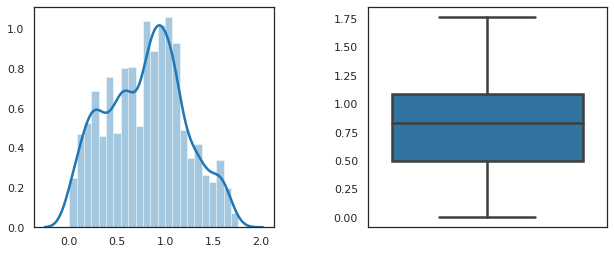

In [ ]:
pt_CCAvg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_CCAvg.fit(X_train["CCAvg"].values.reshape(-1, 1))
ptc = pt_CCAvg.transform(X_train["CCAvg"].values.reshape(-1, 1))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", ax=axes[1])
fig.tight_layout(pad=5.0)

Observation: Distribution of 'CCAvg' feature is no longer skewed and there are no Outliers as well.

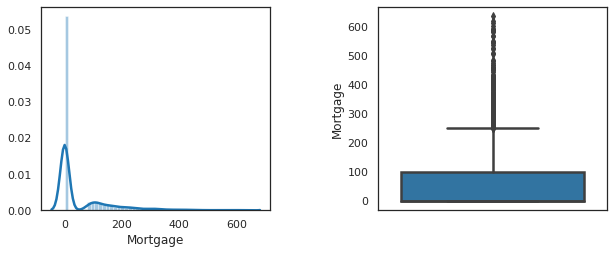

In [ ]:
# Feature 5: 'Mortgage'

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Mortgage"], ax=axes[0]);
sns.boxplot(X_train["Mortgage"], orient="v", ax=axes[1])

fig.tight_layout(pad=5.0)

Observation:'Mortgage' is highly skewed.We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to test_X as well.

In [ ]:
X_train["int_Mortgage"] = pd.cut(X_train["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("Mortgage", axis=1, inplace=True)

X_test["int_Mortgage"] = pd.cut(X_test["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
X_test.drop("Mortgage", axis=1, inplace=True)

The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [ ]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

Now, we inspect the linear correlations between features and also between features and output. Pandas corr function is used to compute correlation matrix and Seaborn heatmap is used for plotting. The semicolon at the end of seaborn command is used to suppress the output other than the plot. Correlation is in interval [-1,1]:-

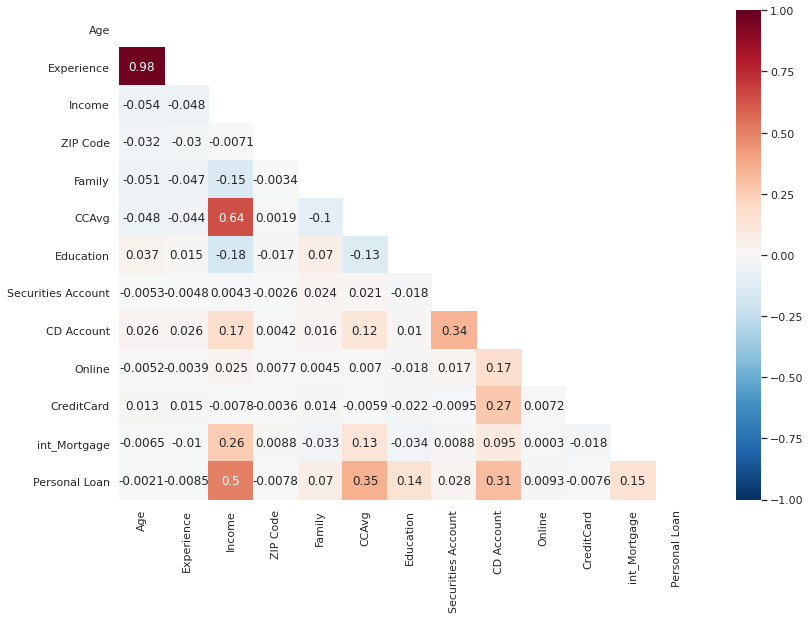

In [ ]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

In [ ]:
X_train.drop("Experience", axis=1, inplace=True)
X_test.drop("Experience", axis=1, inplace=True)

## Predictions using various Training Models:- 

**1) Logistic Regression Model:-**

In [ ]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction & Evaluation:-

In [ ]:
logmodel.score(X_train, y_train)

0.952

In [ ]:
logmodel.score(X_test, y_test)

0.9513333333333334

In [ ]:
logmodel_predict = logmodel.predict(X_test)

In [ ]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))
acc_score = accuracy_score(y_test, logmodel_predict)
f1_score = f1_score(y_test, logmodel_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(acc_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))

[[1337   19]
 [  54   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy Score  for Logistic Regression is: 95.13333333333334
F1 Score  for Logistic Regression is: 71.14624505928855


##

***Now, Let's split the dataset again into 70:30 so that we can apply other models to see if we get more accuracy for prediction:-***

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

**Using Decision Tree Classifier:-**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.score(test_set , test_labels)

0.9773333333333334

**Using Naive Bayes:-**

In [ ]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

**Using Random Forest classifier:-**

In [ ]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.904

**Using KNN ( K - Nearest Neighbour ):-**

In [ ]:
train_set_indep = data.drop(['Experience'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = data["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


Model Comparison:-

In [ ]:
X=data.drop(['Personal Loan','Experience'],axis=1)
y=data.pop('Personal Loan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.912000 (0.015748)
CART: 0.982800 (0.004400)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.987000 (0.003715)


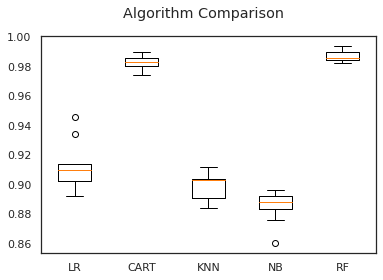

In [ ]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusion:-**

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like ***Decision Tree algorithm*** have the highest accuracy and we can choose that as our final model.